# Finding the unloaded geometry

In [2]:
import matplotlib.pyplot as plt
import dolfin
import pulse


geometry = pulse.HeartGeometry.from_file(pulse.mesh_paths['simple_ellipsoid'])
material = pulse.HolzapfelOgden()
# material = pulse.Guccione()

# Parameter for the cardiac boundary conditions
bcs_parameters = pulse.MechanicsProblem.default_bcs_parameters()
bcs_parameters['base_spring'] = 1.0
bcs_parameters['base_bc'] = 'fix_x'

# Create the problem
problem = pulse.MechanicsProblem(geometry, material,
                                 bcs_parameters=bcs_parameters)

# Suppose geometry is loaded with a pressure of 1 kPa
# and create the unloader
unloader = pulse.FixedPointUnloader(problem=problem,
                                    pressure=1.0)

# Unload the geometry
unloader.unload()

# Get the unloaded geometry
unloaded_geometry = unloader.unloaded_geometry

2019-05-22 07:49:36,245 - pulse.geometry_utils - INFO - 
Load mesh from h5
2019-05-22 07:49:36,392 - pulse.unloader - INFO - 

-------------------------- Unloading options ---------------------------

	Target pressure: 1.0
	maxiter = 10
	tolerance = 0.0001
	regenerate_fibers (serial only)= False

------------------------------------------------------------------------

2019-05-22 07:49:36,393 - pulse.unloader - INFO - ------------------------------------------------------------------------
2019-05-22 07:49:36,394 - pulse.unloader - INFO - ----------------------------Start unloading-----------------------------
2019-05-22 07:49:36,394 - pulse.unloader - INFO - ------------------------------------------------------------------------
2019-05-22 07:49:36,399 - pulse.unloader - INFO - 
LV Volume of original geometry = 2.511 ml
2019-05-22 07:49:36,435 - pulse.unloader - INFO - 
Do an intial solve
2019-05-22 07:49:36,855 - pulse.iterate - INFO - Control: [0.0]
2019-05-22 07:49:36,856 - pulse.

2019-05-22 07:49:46,675 - pulse.iterate - INFO - Check target reached: NO
2019-05-22 07:49:46,675 - pulse.iterate - INFO - Maximum difference: 5.000e-02
2019-05-22 07:49:46,676 - pulse.iterate - INFO - Adapt step size. New step size: 0.675
2019-05-22 07:49:46,677 - pulse.iterate - INFO - Check target reached: NO
2019-05-22 07:49:46,678 - pulse.iterate - INFO - Maximum difference: 5.000e-02
2019-05-22 07:49:46,678 - pulse.iterate - INFO - Change step size for final iteration
2019-05-22 07:49:46,679 - pulse.iterate - INFO - Try new control
2019-05-22 07:49:46,679 - pulse.iterate - INFO - Current control: 1.000
2019-05-22 07:49:47,108 - pulse.iterate - INFO - 
SUCCESFULL STEP:
2019-05-22 07:49:47,109 - pulse.iterate - INFO - Check target reached: YES!
2019-05-22 07:49:47,110 - pulse.iterate - INFO - Check target reached: YES!
2019-05-22 07:49:47,126 - pulse.unloading_utils - INFO - 
LV Volume of inflated geometry = 1.862 ml
2019-05-22 07:49:48,354 - pulse.unloading_utils - INFO - 
LV Volu

2019-05-22 07:50:00,818 - pulse.iterate - INFO - 
SUCCESFULL STEP:
2019-05-22 07:50:00,818 - pulse.iterate - INFO - Check target reached: NO
2019-05-22 07:50:00,819 - pulse.iterate - INFO - Maximum difference: 5.000e-01
2019-05-22 07:50:00,819 - pulse.iterate - INFO - Adapt step size. New step size: 0.450
2019-05-22 07:50:00,820 - pulse.iterate - INFO - Check target reached: NO
2019-05-22 07:50:00,821 - pulse.iterate - INFO - Maximum difference: 5.000e-01
2019-05-22 07:50:00,822 - pulse.iterate - INFO - Try new control
2019-05-22 07:50:00,822 - pulse.iterate - INFO - Current control: 0.950
2019-05-22 07:50:01,531 - pulse.iterate - INFO - 
SUCCESFULL STEP:
2019-05-22 07:50:01,532 - pulse.iterate - INFO - Check target reached: NO
2019-05-22 07:50:01,532 - pulse.iterate - INFO - Maximum difference: 5.000e-02
2019-05-22 07:50:01,533 - pulse.iterate - INFO - Adapt step size. New step size: 0.675
2019-05-22 07:50:01,534 - pulse.iterate - INFO - Check target reached: NO
2019-05-22 07:50:01,53

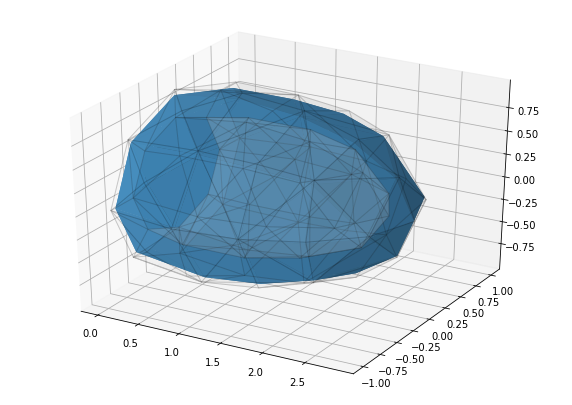

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
dolfin.plot(geometry.mesh, alpha=0.1, edgecolor='k', color='w')
dolfin.plot(unloaded_geometry.mesh)
plt.show()